BIG MART SALES PREDICTION-(TEST DATA ->DATA PREPARATION)

In [57]:
#by Thasleem Arifa M(KRCE)-Test data 
#importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the dataset

In [58]:
BIGMARTdata=pd.read_csv("C:/Users/Nazreen/AppData/Local/Temp/f14eb096-6617-449e-ab95-971fcb691e6b_9961_14084_bundle_archive.zip.e6b/Test.csv")
BIGMARTdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [59]:
BIGMARTdata.shape

(5681, 11)

In [60]:
BIGMARTdata.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [61]:
BIGMARTdata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Data Cleaning and Exploration for each attribute

In [62]:
BIGMARTdata.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [63]:
BIGMARTdata.duplicated().any()

False

Item Weight

Handling the Missing Values using Univariate Imputation

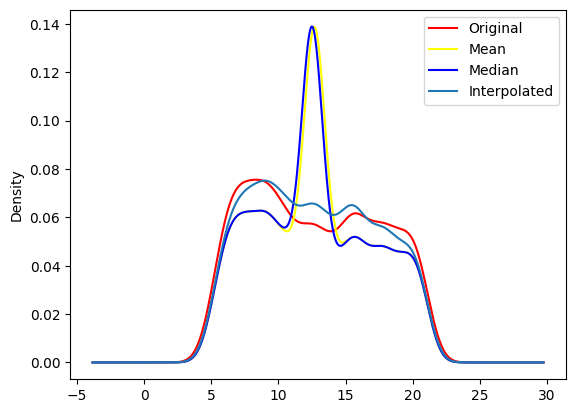

In [64]:
mean_wt=BIGMARTdata["Item_Weight"].mean()
median_wt=BIGMARTdata["Item_Weight"].median()
BIGMARTdata["Item_Weight_mean"]=BIGMARTdata["Item_Weight"].fillna(mean_wt)
BIGMARTdata["Item_Weight_median"]=BIGMARTdata["Item_Weight"].fillna(median_wt)
BIGMARTdata["Item_Weight_interpolation_imputation"]=BIGMARTdata["Item_Weight"].interpolate("linear")
BIGMARTdata["Item_Weight"].plot(kind="kde",color="red",label="Original")
BIGMARTdata["Item_Weight_mean"].plot(kind="kde",color="yellow",label="Mean")
BIGMARTdata["Item_Weight_median"].plot(kind="kde",color="blue",label="Median")
BIGMARTdata["Item_Weight_interpolation_imputation"].plot(kind="kde",label="Interpolated")
plt.legend()
plt.show()

In [65]:
#We can notice that the mean,median have way lower variance compared to original
print(BIGMARTdata['Item_Weight'].var())
print(BIGMARTdata['Item_Weight_mean'].var())
print(BIGMARTdata['Item_Weight_median'].var())

21.760812343231528
18.021630503972027
18.027077062656037


<Axes: >

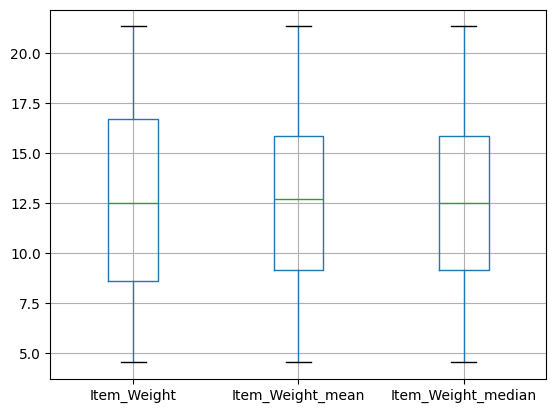

In [66]:
BIGMARTdata[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

<Axes: >

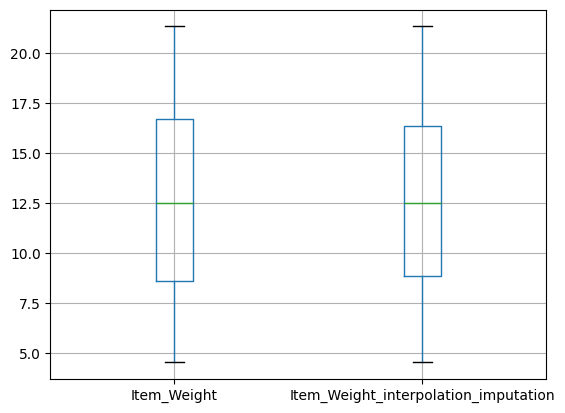

In [67]:
#From the above boxplot, we can conclude that the Item_Weight_mean & Item_Weight_median have lower variance compared to Item_weight.Therefore, we try to compare the variance between Item_weight & Item_Weight_interpolation_imputation.
BIGMARTdata[['Item_Weight','Item_Weight_interpolation_imputation']].boxplot()

In [68]:
print(BIGMARTdata['Item_Weight'].var())
print(BIGMARTdata['Item_Weight_interpolation_imputation'].var())

21.760812343231528
19.990913374786317


Therefore,we choose Item_Weight_interpolation_imputation instead of 'Item_Weight_mean' & 'Item_Weight_median'.

In [69]:
data=BIGMARTdata.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median'],axis=1)


In [70]:
data.isnull().sum()

Item_Identifier                            0
Item_Fat_Content                           0
Item_Visibility                            0
Item_Type                                  0
Item_MRP                                   0
Outlet_Identifier                          0
Outlet_Establishment_Year                  0
Outlet_Size                             1606
Outlet_Location_Type                       0
Outlet_Type                                0
Item_Weight_interpolation_imputation       0
dtype: int64

Outlet Size

In [71]:
data["Outlet_Size"]


0       Medium
1          NaN
2          NaN
3          NaN
4       Medium
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 5681, dtype: object

In [72]:
#We can notice that it is a categorical variable and must be replaced with numerical after filling null values using Bivariate Imputation
data['Outlet_Size'].value_counts()


Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

Bivariate Imputation for filling the missing values

In [73]:
pivot_table = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
pivot_table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [74]:
missing_values = data['Outlet_Size'].isnull()
missing_values

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [75]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :pivot_table[x])
data.isnull().sum()

Item_Identifier                         0
Item_Fat_Content                        0
Item_Visibility                         0
Item_Type                               0
Item_MRP                                0
Outlet_Identifier                       0
Outlet_Establishment_Year               0
Outlet_Size                             0
Outlet_Location_Type                    0
Outlet_Type                             0
Item_Weight_interpolation_imputation    0
dtype: int64

<Axes: >

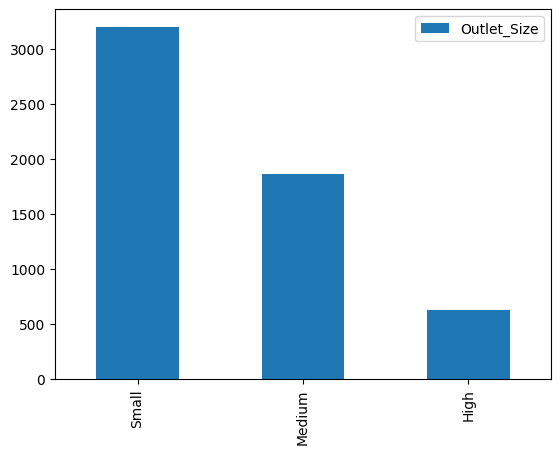

In [76]:
Os=pd.DataFrame(data['Outlet_Size'].value_counts())
Os.plot(kind="bar")

Item_Fat_Content

In [77]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Weight_interpolation_imputation'],
      dtype='object')

In [78]:
IF=pd.DataFrame(data['Item_Fat_Content'].value_counts())
data['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

<Axes: >

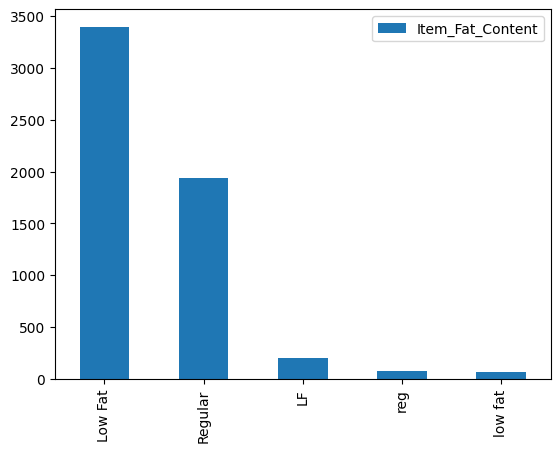

In [79]:
IF.plot(kind='bar')

In [80]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [81]:
data['Item_Fat_Content'].value_counts()

LF         3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

<Axes: >

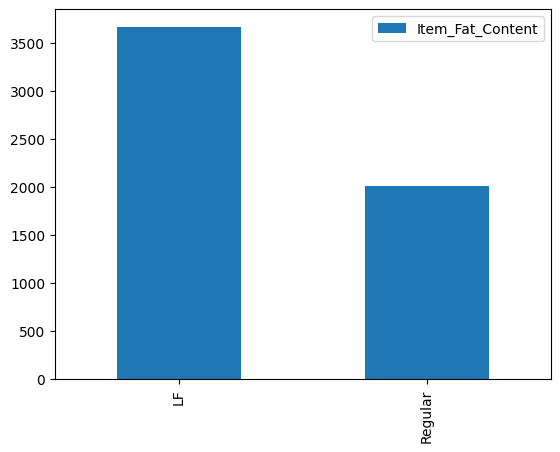

In [82]:
IF=pd.DataFrame(data['Item_Fat_Content'].value_counts())
IF.plot(kind='bar')

In [83]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Weight_interpolation_imputation'],
      dtype='object')

Item_Visibility

In [84]:
data['Item_Visibility'].value_counts()

0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: Item_Visibility, Length: 5277, dtype: int64

In [85]:
data['Item_Visibility_interpolate']=data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [86]:
data['Item_Visibility_interpolate'].value_counts()

0.093531    2
0.072816    2
0.202948    2
0.107493    2
0.112131    2
           ..
0.089452    1
0.133171    1
0.103428    1
0.073685    1
0.104720    1
Name: Item_Visibility_interpolate, Length: 5629, dtype: int64

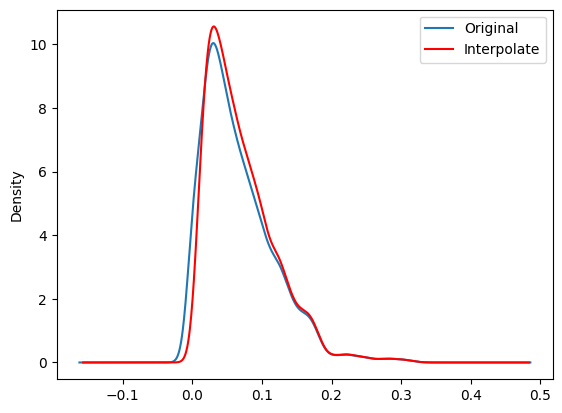

In [87]:
data['Item_Visibility'].plot(kind="kde",label="Original")

data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [88]:
data = data.drop('Item_Visibility',axis=1)

In [89]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolation_imputation,Item_Visibility_interpolate
0,FDW58,LF,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,20.75,0.007565


Item_Type

In [90]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type',
       'Item_Weight_interpolation_imputation', 'Item_Visibility_interpolate'],
      dtype='object')

In [91]:
IT=pd.DataFrame(data['Item_Type'].value_counts())
data['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

<Axes: >

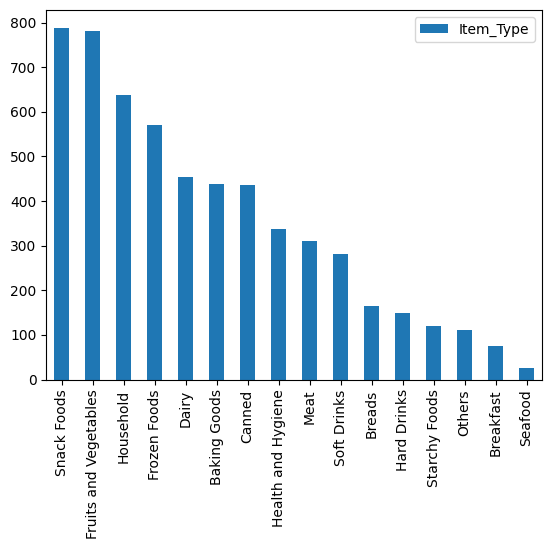

In [92]:
IT.plot(kind='bar')

Item_Identifier

In [93]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type',
       'Item_Weight_interpolation_imputation', 'Item_Visibility_interpolate'],
      dtype='object')

In [94]:
data['Item_Identifier'].value_counts()

DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [95]:
data['Item_Identifier_Grouped'] =data['Item_Identifier'].apply(lambda x : x[:2])

In [96]:
data['Item_Identifier_Grouped'].value_counts()

FD    4076
NC    1087
DR     518
Name: Item_Identifier_Grouped, dtype: int64

<Axes: >

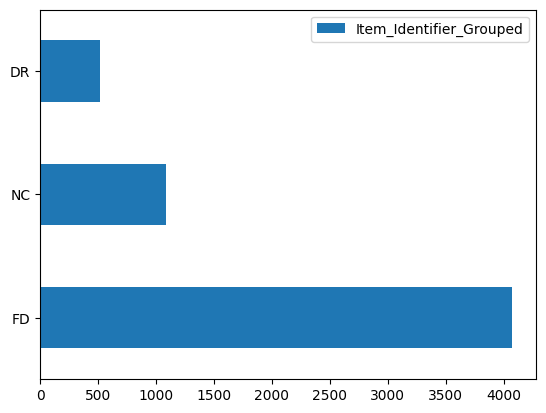

In [97]:
II=pd.DataFrame(data['Item_Identifier_Grouped'].value_counts())
II.plot(kind='barh')

In [98]:
data = data.drop(['Item_Identifier'],axis=1)

Outlet_Establishment_Year

In [99]:
data.columns

Index(['Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Weight_interpolation_imputation',
       'Item_Visibility_interpolate', 'Item_Identifier_Grouped'],
      dtype='object')

In [100]:
data['Outlet_Establishment_Year']

0       1999
1       2007
2       1998
3       2007
4       1985
        ... 
5676    1997
5677    2009
5678    2002
5679    2007
5680    2002
Name: Outlet_Establishment_Year, Length: 5681, dtype: int64

In [101]:
import datetime as dt
current_year = dt.datetime.today().year
data['Outlet_age']= current_year - data['Outlet_Establishment_Year']
data.head(1)

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolation_imputation,Item_Visibility_interpolate,Item_Identifier_Grouped,Outlet_age
0,LF,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,20.75,0.007565,FD,25


<Axes: ylabel='Frequency'>

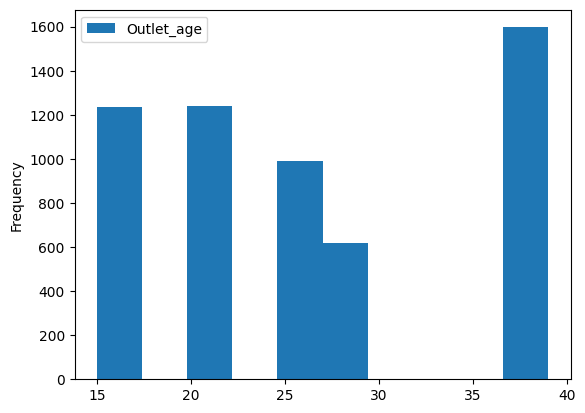

In [102]:
OA=pd.DataFrame(data['Outlet_age'])
OA.plot(kind='hist')

In [103]:
data = data.drop(['Outlet_Establishment_Year'],axis=1)

In [104]:
data.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolation_imputation,Item_Visibility_interpolate,Item_Identifier_Grouped,Outlet_age
0,LF,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,20.7500,0.007565,FD,25
1,Regular,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1,8.3000,0.038428,FD,17
2,LF,Others,241.7538,OUT010,Small,Tier 3,Grocery Store,14.6000,0.099575,NC,26
3,LF,Snack Foods,155.0340,OUT017,Small,Tier 2,Supermarket Type1,7.3150,0.015388,FD,17
4,Regular,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,8.5575,0.118599,FD,39


Data Encoding and Labelling for handling categorical variables


In [105]:
from sklearn.preprocessing import OrdinalEncoder

encoded_data = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    encoded_data[col]=oe.fit_transform(encoded_data[[col]])
    print(oe.categories_)

[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]
[array(['DR', 'FD', 'NC'], dtype=object)]


In [107]:
encoded_data.head(3)
#therefore all the test data have been preprocessed and encoded

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolation_imputation,Item_Visibility_interpolate,Item_Identifier_Grouped,Outlet_age
0,0.0,13.0,107.8622,9.0,1.0,0.0,1.0,20.75,0.007565,1.0,25
1,1.0,4.0,87.3198,2.0,2.0,1.0,1.0,8.30,0.038428,1.0,17
2,0.0,11.0,241.7538,0.0,2.0,2.0,0.0,14.60,0.099575,2.0,26
